In [160]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### 2. Input the data and create a pandas DataFrame.

In [161]:
dataframe = pd.read_csv('us.csv')
dataframe['date'] = pd.to_datetime(dataframe['date'])

# Displaying DataFrame just to see everything
dataframe

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
224,2020-09-01,6088842,184564
225,2020-09-02,6121842,185640
226,2020-09-03,6167443,186718
227,2020-09-04,6218913,187698


### 3. Display the first 10 rows of the table.

In [162]:
dataframe.head(10)

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
5,2020-01-26,5,0
6,2020-01-27,5,0
7,2020-01-28,5,0
8,2020-01-29,5,0
9,2020-01-30,6,0


### 4. Use Matplotlib or Pandas built-in plot to plot the numbers of daily total cases and deaths (this is what is in the dataset) between January to end of August. Use bars to display cases and red line to show the death in a single chart.

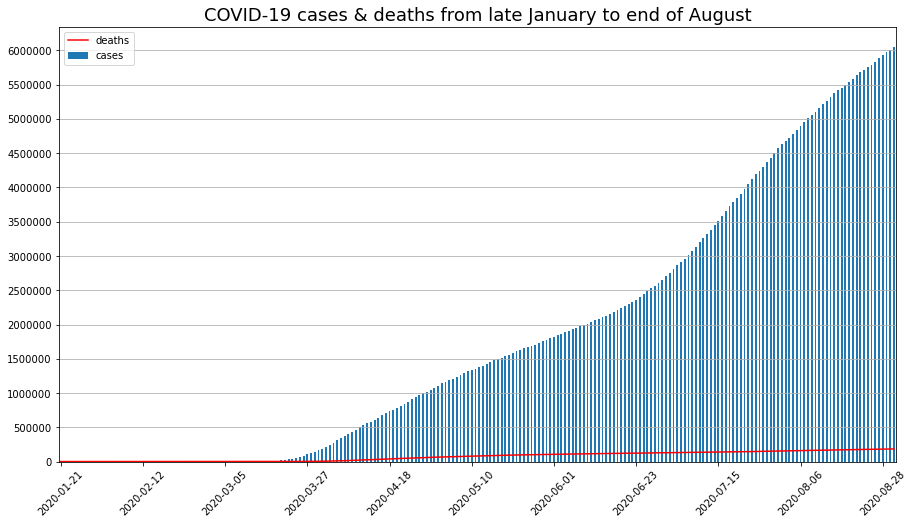

In [163]:
fig4, ax4 = plt.subplots(figsize=(10, 8))
ax4.ticklabel_format(useOffset=False, style='plain')

# Select and plot data
january_to_august = dataframe[(dataframe['date'] >= '2020-01-01') & (dataframe['date'] < '2020-09-01')]
january_to_august['cases'].plot(kind='bar', ax=ax4, figsize=(15, 8), rot=45)
january_to_august['deaths'].plot(kind='line', ax=ax4, figsize=(15, 8), color='r', rot=45)

# Change y-axis stuff
ax4.set_yticks([i for i in range(0, 6000001, 500000)])
ax4.grid(axis='y')

# Change x-axis stuff
xticks = [i for i in range(min(ax4.get_xticks()), max(ax4.get_xticks()), (min(ax4.get_xticks()) + max(ax4.get_xticks())) // 10)]
ax4.set_xticks(xticks)
ax4.set_xticklabels(january_to_august['date'][xticks].dt.date)

# Add title
ax4.set_title('COVID-19 cases & deaths from late January to end of August', fontsize=18)

# Add legend to plot
ax4.legend(loc='upper left')

print()

### 5. Compute the daily <ins>new</ins> cases and new deaths, and assign the result to a new DataFrame. Show the first 10 rows of your table.

In [164]:
daily_updates_dataframe = dataframe.copy()
daily_updates_dataframe[['cases', 'deaths']] = dataframe[['cases', 'deaths']].diff(periods=1)

# I show 11 rows because the first row is the first day so there can't be any "increase" 
# since it's the first recording of data. I show the first 10 rows (index 1 -> 10) where 
# increase is possible
daily_updates_dataframe.head(11)

,date,cases,deaths
0,2020-01-21,NaN,NaN
1,2020-01-22,0.0,0.0
2,2020-01-23,0.0,0.0
3,2020-01-24,1.0,0.0
4,2020-01-25,1.0,0.0
5,2020-01-26,2.0,0.0
6,2020-01-27,0.0,0.0
7,2020-01-28,0.0,0.0
8,2020-01-29,0.0,0.0
9,2020-01-30,1.0,0.0


### 6. Plot the daily new cases and deaths from (5) in the same way as in (4).

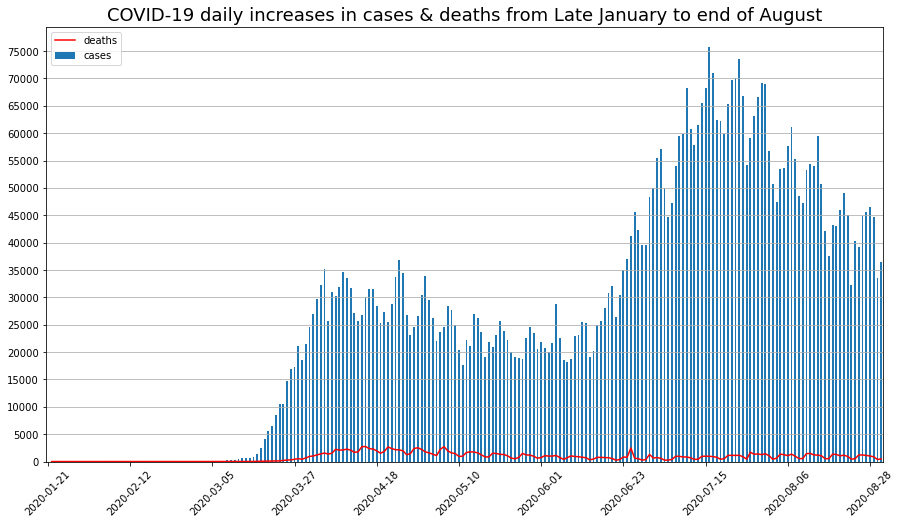

In [165]:
fig6, ax6 = plt.subplots(figsize=(10, 8))
ax6.ticklabel_format(useOffset=False, style='plain')

# Select and plot data
january_to_august_increases = daily_updates_dataframe[(dataframe['date'] >= '2020-01-01') & (dataframe['date'] < '2020-09-01')]
january_to_august_increases['cases'].plot(kind='bar', ax=ax6, figsize=(15, 8), rot=45)
january_to_august_increases['deaths'].plot(kind='line', ax=ax6, figsize=(15, 8), color='r', rot=45)

# Change y-axis stuff
ax6.set_yticks([i for i in range(0, 75001, 5000)])
ax6.grid(axis='y')

# Change x-axis stuff
xticks = [i for i in range(min(ax6.get_xticks()), max(ax6.get_xticks()), (min(ax6.get_xticks()) + max(ax6.get_xticks())) // 10)]
ax6.set_xticks(xticks)
ax6.set_xticklabels(january_to_august['date'][xticks].dt.date)

# Add title
ax6.set_title('COVID-19 daily increases in cases & deaths from Late January to end of August', fontsize=18)

# Add legend to plot
ax6.legend(loc='upper left')

print()

### 7. Calculate <ins>7 days average</ins> of daily new cases and deaths, and assign the result to a new DataFrame. Show the first 10 rows of your table.

In [166]:
seven_day_averages_dataframe = daily_updates_dataframe.rolling(7).mean()

# Similar to before, the first 7 rows are NaN so I show 17 rows so we can see 10 actual
# rows with interesting data
seven_day_averages_dataframe.head(17)

,cases,deaths
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,0.571429,0.0
8,0.571429,0.0
9,0.714286,0.0


### 8. Plot the 7 days averaged new cases and deaths from (7) in the same way as in (4).

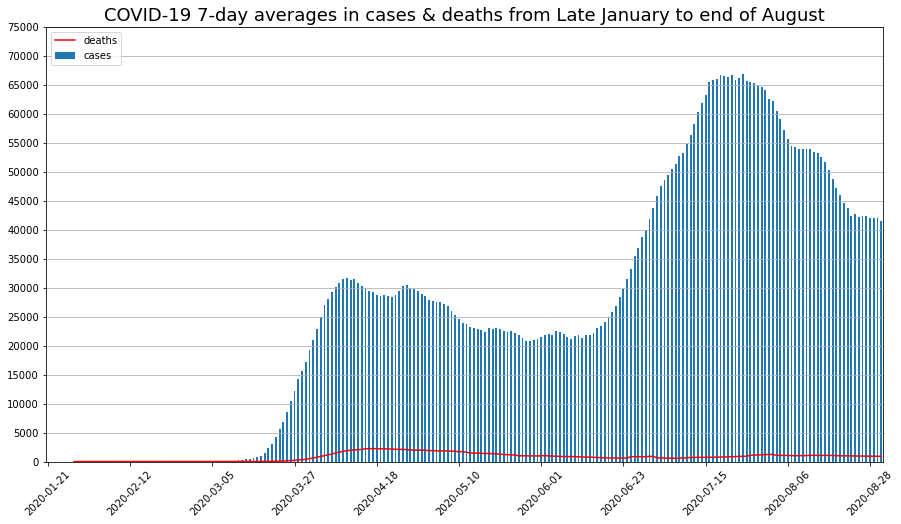

In [167]:
fig8, ax8 = plt.subplots(figsize=(10, 8))
ax8.ticklabel_format(useOffset=False, style='plain')

# Select and plot data
january_to_august_7_day_averages = seven_day_averages_dataframe[(dataframe['date'] >= '2020-01-01') & (dataframe['date'] < '2020-09-01')]
january_to_august_7_day_averages['cases'].plot(kind='bar', ax=ax8, figsize=(15, 8), rot=45)
january_to_august_7_day_averages['deaths'].plot(kind='line', ax=ax8, figsize=(15, 8), color='r', rot=45)

# Change y-axis stuff
ax8.set_yticks([i for i in range(0, 75001, 5000)])
ax8.grid(axis='y')

# Change x-axis stuff
xticks = [i for i in range(min(ax8.get_xticks()), max(ax8.get_xticks()), (min(ax8.get_xticks()) + max(ax8.get_xticks())) // 10)]
ax8.set_xticks(xticks)
ax8.set_xticklabels(january_to_august['date'][xticks].dt.date)

# Add title
ax8.set_title('COVID-19 7-day averages in cases & deaths from Late January to end of August', fontsize=18)

# Add legend to plot
ax8.legend(loc='upper left')

print()

### 9. Calculate <ins>monthly average</ins> of per day new cases and deaths, and assign the result into a new data frame. Display the numbers by month in ascending order

In [168]:
monthly_averages_dataframe = daily_updates_dataframe.groupby(pd.Grouper(key='date', freq='1M')).mean()
monthly_averages_dataframe.index = monthly_averages_dataframe.index.month_name()

# Sorting cases in ascending order
monthly_averages_dataframe.sort_values('cases', ascending=True)

,cases,deaths
date,,
January,0.600000,0.000000
February,2.172414,0.034483
March,6077.129032,138.806452
May,23339.193548,1330.258065
June,28465.733333,769.433333
April,29576.500000,1961.200000
September,43235.600000,987.200000
August,47526.870968,955.258065
July,61878.677419,851.580645


In [169]:
# Sorting deaths in ascending order
monthly_averages_dataframe.sort_values('deaths', ascending=True)

,cases,deaths
date,,
January,0.600000,0.000000
February,2.172414,0.034483
March,6077.129032,138.806452
June,28465.733333,769.433333
July,61878.677419,851.580645
August,47526.870968,955.258065
September,43235.600000,987.200000
May,23339.193548,1330.258065
April,29576.500000,1961.200000


### 10. Plot the monthly averaged per day new cases and deaths from (9) in the same way as in (4).

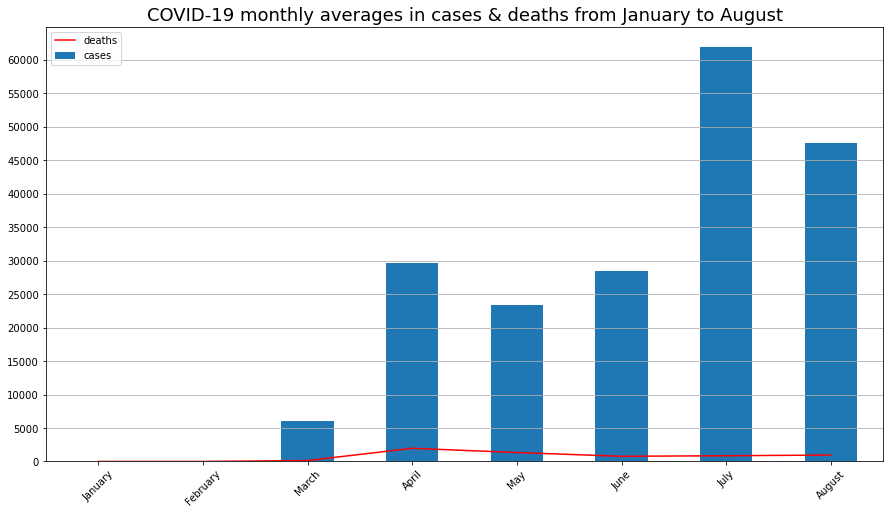

In [170]:
fig10, ax10 = plt.subplots(figsize=(10, 8))
ax10.ticklabel_format(useOffset=False, style='plain')

# Select and plot data
monthly_averages = monthly_averages_dataframe.loc['January':'August']
monthly_averages.index.name = None
monthly_averages['cases'].plot(kind='bar', ax=ax10, figsize=(15, 8), rot=45, use_index=True)
monthly_averages['deaths'].plot(kind='line', ax=ax10, figsize=(15, 8), color='r', rot=45, use_index=True)

# Change y-axis stuff
ax10.set_yticks([i for i in range(0, 60001, 5000)])
ax10.grid(axis='y')

# Add title
ax10.set_title('COVID-19 monthly averages in cases & deaths from January to August', fontsize=18)

# Add legend to plot
ax10.legend(loc='upper left')

print()

### 11. Identify the top and bottom 10 days of new cases and show the dates and the numbers. 

In [171]:
# Top 10 days of new cases
daily_updates_dataframe.sort_values('cases', ascending=False).head(10)[['date', 'cases']]

,date,cases
177,2020-07-16,75682.0
185,2020-07-24,73524.0
178,2020-07-17,70922.0
184,2020-07-23,70004.0
183,2020-07-22,69737.0
191,2020-07-30,69111.0
192,2020-07-31,69059.0
176,2020-07-15,68336.0
171,2020-07-10,68224.0
186,2020-07-25,66776.0


In [172]:
# Bottom 10 days of new cases
daily_updates_dataframe.sort_values('cases', ascending=True).head(10)[['date', 'cases']]

,date,cases
1,2020-01-22,0.0
29,2020-02-19,0.0
28,2020-02-18,0.0
26,2020-02-16,0.0
25,2020-02-15,0.0
24,2020-02-14,0.0
21,2020-02-11,0.0
19,2020-02-09,0.0
18,2020-02-08,0.0
17,2020-02-07,0.0


### 12. Identify the top and bottom 10 days of new deaths and show the dates and the numbers.

In [173]:
# Top 10 days of deaths
daily_updates_dataframe.sort_values('deaths', ascending=False).head(10)[['date', 'deaths']]

,date,deaths
85,2020-04-15,2752.0
106,2020-05-06,2708.0
84,2020-04-14,2705.0
91,2020-04-21,2672.0
99,2020-04-29,2514.0
156,2020-06-25,2466.0
98,2020-04-28,2394.0
92,2020-04-22,2371.0
86,2020-04-16,2349.0
87,2020-04-17,2289.0


In [174]:
# Bottom 10 days of deaths
daily_updates_dataframe.sort_values('deaths', ascending=True).head(10)[['date', 'deaths']]

,date,deaths
1,2020-01-22,0.0
23,2020-02-13,0.0
24,2020-02-14,0.0
25,2020-02-15,0.0
26,2020-02-16,0.0
28,2020-02-18,0.0
29,2020-02-19,0.0
30,2020-02-20,0.0
22,2020-02-12,0.0
31,2020-02-21,0.0


### 13. Identify the top five weeks that had the most increase in cases. Show your result in a table that indicates the week and number.

In [175]:
weekly_averages_dataframe = daily_updates_dataframe.groupby(pd.Grouper(key='date', freq='1W')).mean()

In [176]:
# Date corresponds to a Monday-Sunday week, the date presented in the last day in a given week (a Sunday)
weekly_averages_dataframe.sort_values('cases', ascending=False).head(5).drop('deaths', axis=1)

,cases
date,
2020-07-19,66689.571429
2020-07-26,65630.285714
2020-08-02,62098.571429
2020-07-12,58210.142857
2020-08-09,53902.000000


### 14. Identify the top five weeks that had the most increase in deaths. Show your result in a table that indicates the week and number.

In [177]:
weekly_averages_dataframe.sort_values('deaths', ascending=False).head(5).drop('cases', axis=1)

,deaths
date,
2020-04-19,2190.000000
2020-04-26,2057.285714
2020-04-12,1999.000000
2020-05-03,1890.857143
2020-05-10,1707.142857


### 15. Display (4) (6) (8) (10) together as subplots with clear subplot titles.

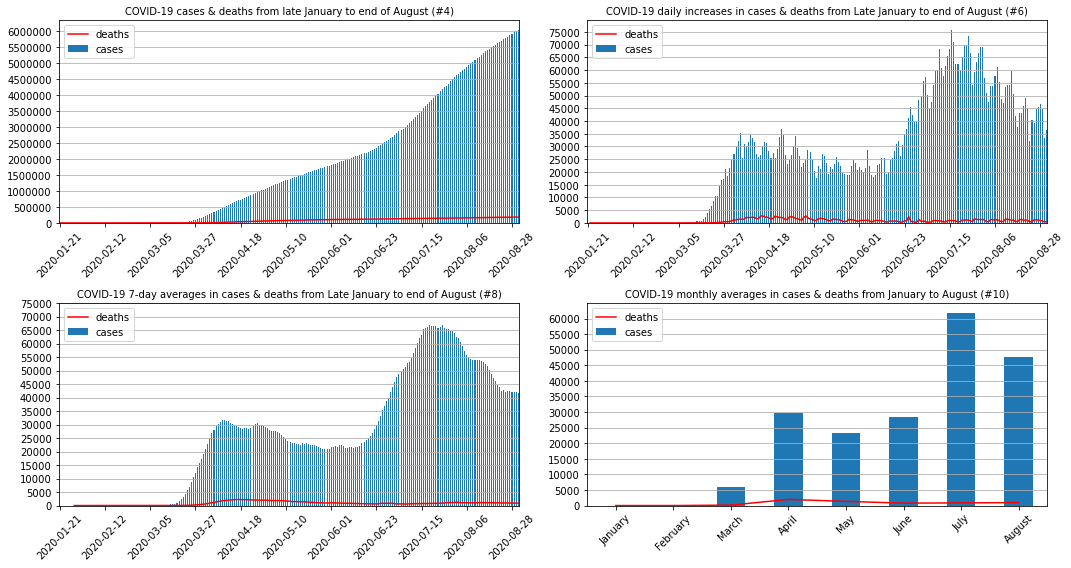

In [178]:
# There has to be a better and more code-efficient way to do this part but I could not figure
# out how to reuse my previous figures/axes

fig, axes = plt.subplots(2, 2, figsize=(30, 25))

##### 4
axes[0, 0].ticklabel_format(useOffset=False, style='plain')

# Select and plot data
january_to_august = dataframe[(dataframe['date'] >= '2020-01-01') & (dataframe['date'] < '2020-09-01')]
january_to_august['cases'].plot(kind='bar', ax=axes[0, 0], rot=45)
january_to_august['deaths'].plot(kind='line', ax=axes[0, 0], color='r', rot=45)

# Change y-axis stuff
axes[0, 0].set_yticks([i for i in range(0, 6000001, 500000)])
axes[0, 0].grid(axis='y')

# Change x-axis stuff
xticks = [i for i in range(min(axes[0, 0].get_xticks()), max(axes[0, 0].get_xticks()), (min(axes[0, 0].get_xticks()) + max(axes[0, 0].get_xticks())) // 10)]
axes[0, 0].set_xticks(xticks)
axes[0, 0].set_xticklabels(january_to_august['date'][xticks].dt.date)

# Add title
axes[0, 0].set_title('COVID-19 cases & deaths from late January to end of August (#4)', fontsize=10)

# Add legend to plot
axes[0, 0].legend(loc='upper left')

##### 6
axes[0, 1].ticklabel_format(useOffset=False, style='plain')

# Select and plot data
january_to_august_increases = daily_updates_dataframe[(dataframe['date'] >= '2020-01-01') & (dataframe['date'] < '2020-09-01')]
january_to_august_increases['cases'].plot(kind='bar', ax=axes[0, 1], figsize=(15, 8), rot=45)
january_to_august_increases['deaths'].plot(kind='line', ax=axes[0, 1], figsize=(15, 8), color='r', rot=45)

# Change y-axis stuff
axes[0, 1].set_yticks([i for i in range(0, 75001, 5000)])
axes[0, 1].grid(axis='y')

# Change x-axis stuff
xticks = [i for i in range(min(axes[0, 1].get_xticks()), max(axes[0, 1].get_xticks()), (min(axes[0, 1].get_xticks()) + max(axes[0, 1].get_xticks())) // 10)]
axes[0, 1].set_xticks(xticks)
axes[0, 1].set_xticklabels(january_to_august['date'][xticks].dt.date)

# Add title
axes[0, 1].set_title('COVID-19 daily increases in cases & deaths from Late January to end of August (#6)', fontsize=10)

# Add legend to plot
axes[0, 1].legend(loc='upper left')

##### 8
axes[1, 0].ticklabel_format(useOffset=False, style='plain')

# Select and plot data
january_to_august_7_day_averages = seven_day_averages_dataframe[(dataframe['date'] >= '2020-01-01') & (dataframe['date'] < '2020-09-01')]
january_to_august_7_day_averages['cases'].plot(kind='bar', ax=axes[1, 0], figsize=(15, 8), rot=45)
january_to_august_7_day_averages['deaths'].plot(kind='line', ax=axes[1, 0], figsize=(15, 8), color='r', rot=45)

# Change y-axis stuff
axes[1, 0].set_yticks([i for i in range(0, 75001, 5000)])
axes[1, 0].grid(axis='y')

# Change x-axis stuff
xticks = [i for i in range(min(axes[1, 0].get_xticks()), max(axes[1, 0].get_xticks()), (min(axes[1, 0].get_xticks()) + max(axes[1, 0].get_xticks())) // 10)]
axes[1, 0].set_xticks(xticks)
axes[1, 0].set_xticklabels(january_to_august['date'][xticks].dt.date)

# Add title
axes[1, 0].set_title('COVID-19 7-day averages in cases & deaths from Late January to end of August (#8)', fontsize=10)

# Add legend to plot
axes[1, 0].legend(loc='upper left')

##### 10
axes[1, 1].ticklabel_format(useOffset=False, style='plain')

# Select and plot data
monthly_averages = monthly_averages_dataframe.loc['January':'August']
monthly_averages.index.name = None
monthly_averages['cases'].plot(kind='bar', ax=axes[1, 1], figsize=(15, 8), rot=45, use_index=True)
monthly_averages['deaths'].plot(kind='line', ax=axes[1, 1], figsize=(15, 8), color='r', rot=45, use_index=True)

# Change y-axis stuff
axes[1, 1].set_yticks([i for i in range(0, 60001, 5000)])
axes[1, 1].grid(axis='y')

# Add title
axes[1, 1].set_title('COVID-19 monthly averages in cases & deaths from January to August (#10)', fontsize=10)

# Add legend to plot
axes[1, 1].legend(loc='upper left')

plt.tight_layout()
print()